In [1]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
from  tensorflow.keras.models  import  Sequential 
from  tensorflow.keras.layers  import  Dense,  Activation,  Dropout,  Flatten, Conv2D,  MaxPool2D, LayerNormalization , BatchNormalization
from  tensorflow.keras.optimizers  import  Adam
from  tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [2]:
#CHARGEMENT DES DONNEES D'APPRENTISSAGE, ON UTILISE LA VALIDATION POUR APPRENDRE
label = np.load( "label_fair_face.npz" )
Y_val = label[ 'yval' ]
X_val = np.load( 'xval.npy' )
Y_val = tf.keras.utils.to_categorical(Y_val)

In [3]:
#DEFINITION MODELE

input_shape = (224, 224, 3)  
model = Sequential( name = 'vgg16' )

# block1 
model.add ( Conv2D (64, (3, 3),  padding = 'same', activation = 'relu', input_shape = input_shape, name = 'block1_conv1' )) 
model.add(BatchNormalization())
model.add ( Conv2D (64 ,(3, 3),  padding = 'same', activation = 'relu', name = 'block1_conv2')) 
model.add(BatchNormalization())
model.add ( MaxPool2D ((2, 2), strides = (2, 2), name = 'block1_pool'))
model.add(Dropout(0.25))

# block2 
model.add ( Conv2D (128, (3, 3),  padding = 'same', activation = 'relu',  name = 'block2_conv1' )) 
model.add(BatchNormalization())
model.add ( Conv2D (128, (3, 3),  padding = 'same', activation = 'relu',  name = 'block2_conv2' ))
model.add(BatchNormalization())
model.add ( MaxPool2D ((2, 2),  strides = (2, 2),  name = 'block2_pool' ))
model.add(Dropout(0.25))

# block3 
model.add ( Conv2D (256, (3, 3),  padding = 'same',  activation = 'relu',  name = 'block3_conv1' )) 
model.add(BatchNormalization())
model.add ( Conv2D (256, (3, 3),  padding = 'same',  activation = 'relu',  name = 'block3_conv2' ))
model.add(BatchNormalization())
model.add ( Conv2D (256, (3, 3),  padding = 'same',  activation = 'relu',  name = 'block3_conv3' )) 
model.add(BatchNormalization())
model.add ( MaxPool2D ((2, 2),  strides = (2, 2),  name = 'block3_pool' ))
model.add(Dropout(0.25))

# block4 
model.add ( Conv2D (512, (3, 3),  padding = 'same',  activation = 'relu',  name = 'block4_conv1' )) 
model.add(BatchNormalization())
model.add ( Conv2D (512, (3, 3),  padding = 'same',  activation = 'relu',  name = 'block4_conv2' ))
model.add(BatchNormalization())
model.add ( Conv2D (512, (3, 3),  padding = 'same',  activation = 'relu',  name = 'block4_conv3' )) 
model.add(BatchNormalization())
model.add ( MaxPool2D ((2, 2),  strides = (2, 2),  name = 'block4_pool' ))
model.add(Dropout(0.25))

# block5 
model.add ( Conv2D (512, (3 , 3),  padding = 'same',  activation = 'relu',  name = 'block5_conv1' )) 
model.add(BatchNormalization())
model.add ( Conv2D (512, (3 , 3),  padding = 'same',  activation = 'relu',  name = 'block5_conv2' ))
model.add(BatchNormalization())
model.add ( Conv2D (512, (3 , 3),  padding = 'same',  activation = 'relu',  name = 'block5_conv3' )) 
model.add(BatchNormalization())
model.add ( MaxPool2D ((2, 2),  strides = (2, 2),  name = 'block5_pool' ))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# block6 pour classifier
model.add ( Conv2D (256, (7, 7),  padding = 'valid',  activation = 'relu',  name = 'block6_conv1' ))
model.add(BatchNormalization())
model.add ( Flatten ( name = 'flatten' )) 
model.add ( Dense (256 ,  activation = 'relu' ,  name = 'fc1' )) 
model.add(Dropout(0.25))
model.add ( Dense (256 ,  activation = 'relu' ,  name = 'fc2' )) 
model.add(Dropout(0.25))

model.add ( Dense (9 ,  activation= 'softmax' ,  name = 'output' ))   # Il y a 9 classes 


model.summary ()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856 

Epoch 1/250
548/548 [==============================] - 261s 476ms/step - loss: 1.9825 - accuracy: 0.2640 - val_loss: 2.0822 - val_accuracy: 0.2720
Epoch 2/250
548/548 [==============================] - 82s 150ms/step - loss: 1.8879 - accuracy: 0.2895 - val_loss: 1.8738 - val_accuracy: 0.2990
Epoch 3/250
548/548 [==============================] - 65s 118ms/step - loss: 1.8755 - accuracy: 0.2956 - val_loss: 1.8522 - val_accuracy: 0.2994
Epoch 4/250
548/548 [==============================] - 65s 119ms/step - loss: 1.8517 - accuracy: 0.3053 - val_loss: 1.8599 - val_accuracy: 0.2935
Epoch 5/250
548/548 [==============================] - 64s 117ms/step - loss: 1.8263 - accuracy: 0.2972 - val_loss: 1.7918 - val_accuracy: 0.3053
Epoch 6/250
548/548 [==============================] - 64s 117ms/step - loss: 1.8077 - accuracy: 0.3046 - val_loss: 1.8279 - val_accuracy: 0.2953
Epoch 7/250
548/548 [==============================] - 65s 118ms/step - loss: 1.8415 - accuracy: 0.3026 - val_loss: 1.8272 

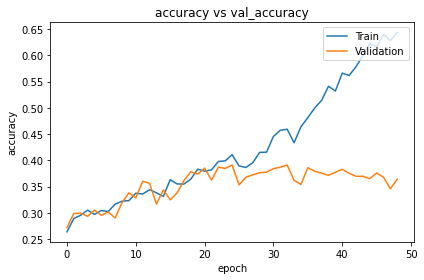

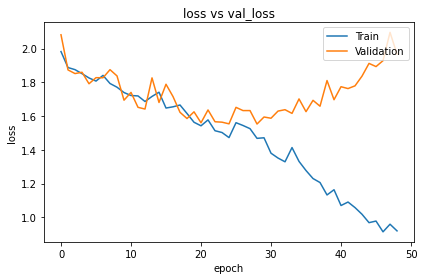

In [4]:
#APPRENTISSAGE
load_model = False
if (load_model == True):
    model = tf.keras.models.load_model('saved_model/model_vgg')
else:
    batch_size = 16
    epochs = 250
    model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr=1e-3),  metrics=['accuracy']) 
    
    callbacks_list = [EarlyStopping(monitor='val_loss', patience=20, verbose = 1)]
    
    history = model.fit(X_val, Y_val, epochs = epochs, batch_size = batch_size,validation_split = 0.2, callbacks=callbacks_list)
    
    tf.keras.models.save_model(model, 'saved_model/model_vgg2', overwrite=True, include_optimizer=True)

    plt.figure()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('accuracy vs val_accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.tight_layout()
    plt.show()

    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('loss vs val_loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.tight_layout()
    plt.show()
